<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Visualization_Functional_Enrichment_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualization of Functional Enrichment Analysis**

# **1) Bar Plot**

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DOSE")

library(DOSE)
data(geneList)
de <- names(geneList)[abs(geneList) > 2]

edo <- enrichDGN(de)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'DOSE'

also installing the dependencies ‘zlibbioc’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘lambda.r’, ‘futile.options’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘futile.logger’, ‘snow’, ‘BH’, ‘cowplot’, ‘fastmatch’, ‘GO.db’, ‘R.utils’, ‘plyr’, ‘AnnotationDbi’, ‘BiocParallel’, ‘fgsea’, ‘GOSemSim’, ‘qvalue’, ‘reshape2’, ‘yulab.utils’


Old packages: 'data.table', 'processx'



DOSE v4.0.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen 

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'enrichplot'

also installing the dependencies ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘aplot’, ‘ggfun’, ‘ggnewscale’, ‘ggrepel’, ‘ggtangle’, ‘igraph’, ‘scatterpie’, ‘ggtree’


Old packages: 'data.table', 'processx'

enrichplot v1.26.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Qianwen Wang, Ming Li, Tianzhi Wu, Li Zhan, Lin Li, Meijun Chen, Wenqin
Xie, Zijing Xie, Erqiang Hu, Shuangbin Xu, Guangchuang Yu. Exploring
epigenomic datasets by ChIPseeker. Current Protocols. 2022, 2(10): e585



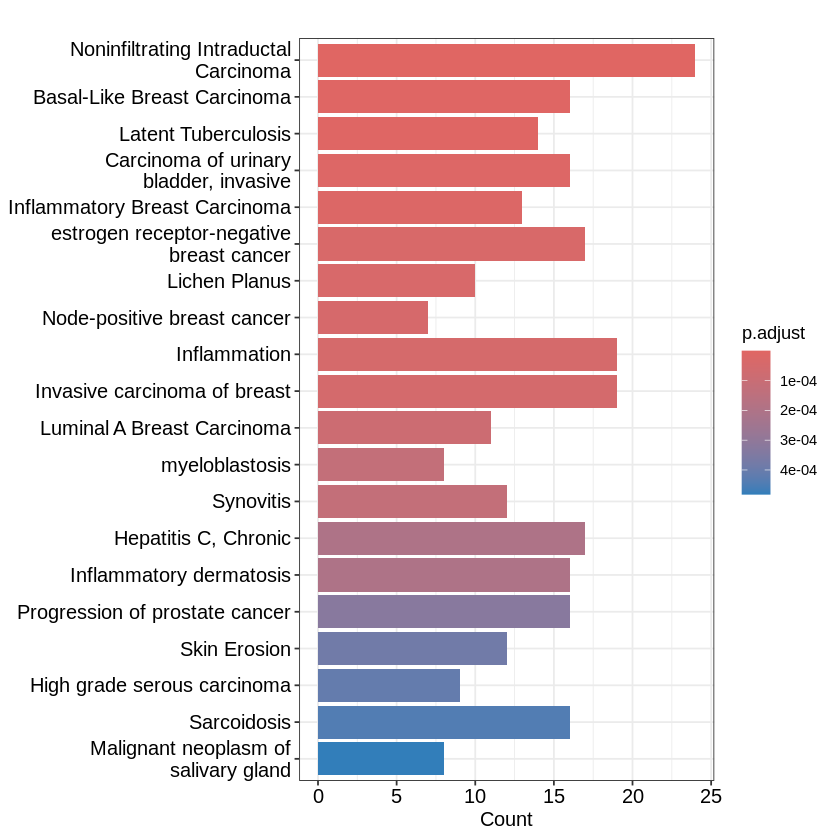

In [ ]:
BiocManager::install("enrichplot")
library(enrichplot)
barplot(edo, showCategory=20)

In [ ]:
mutate(edo, qscore = -log(p.adjust, base=10)) %>%
    barplot(x="qscore")

# **2) Dot plot**

HDO.sqlite is not found, download it online...


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



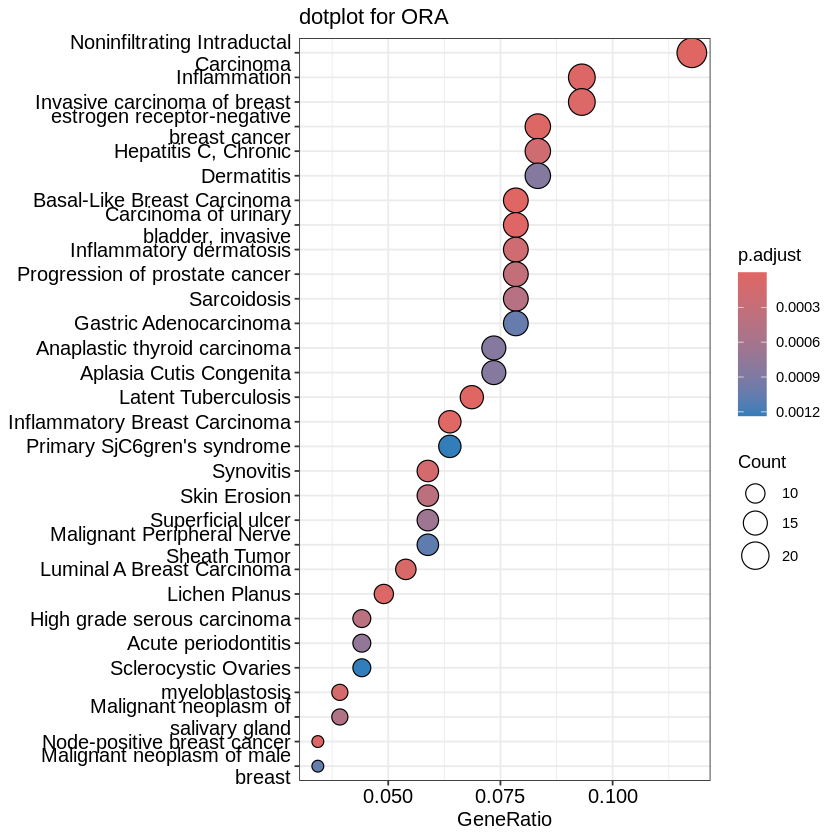

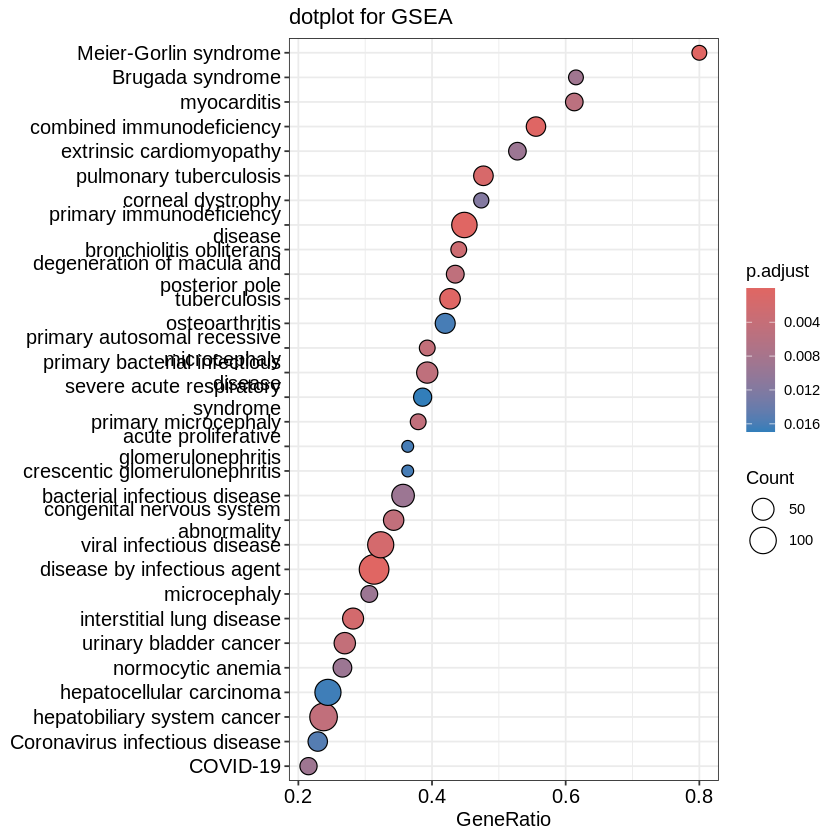

In [ ]:
edo2 <- gseDO(geneList)
dotplot(edo, showCategory=30) + ggtitle("dotplot for ORA")
dotplot(edo2, showCategory=30) + ggtitle("dotplot for GSEA")

# **3) Gene-Concept Network**

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'org.Hs.eg.db'

Old packages: 'data.table', 'processx'

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, 

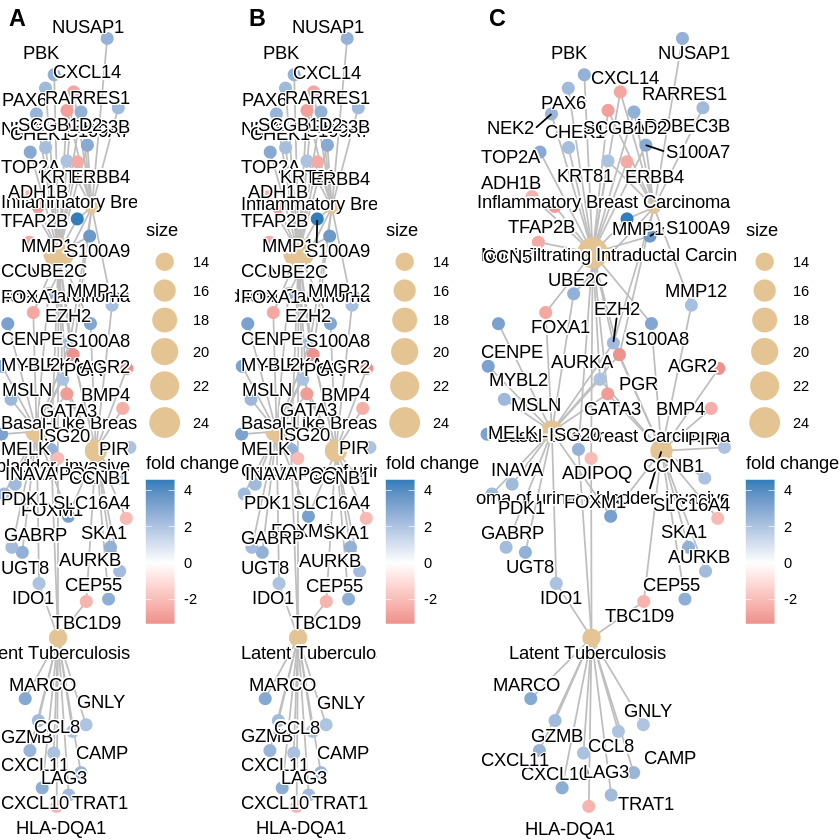

In [ ]:
## convert gene ID to Symbol
BiocManager::install("org.Hs.eg.db")
library(org.Hs.eg.db)
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=geneList)
## categorySize can be scaled by 'pvalue' or 'geneNum'
p2 <- cnetplot(edox, categorySize="pvalue", foldChange=geneList)
p3 <- cnetplot(edox, foldChange=geneList, circular = TRUE, colorEdge = TRUE)
cowplot::plot_grid(p1, p2, p3, ncol=3, labels=LETTERS[1:3], rel_widths=c(.8, .8, 1.2))

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


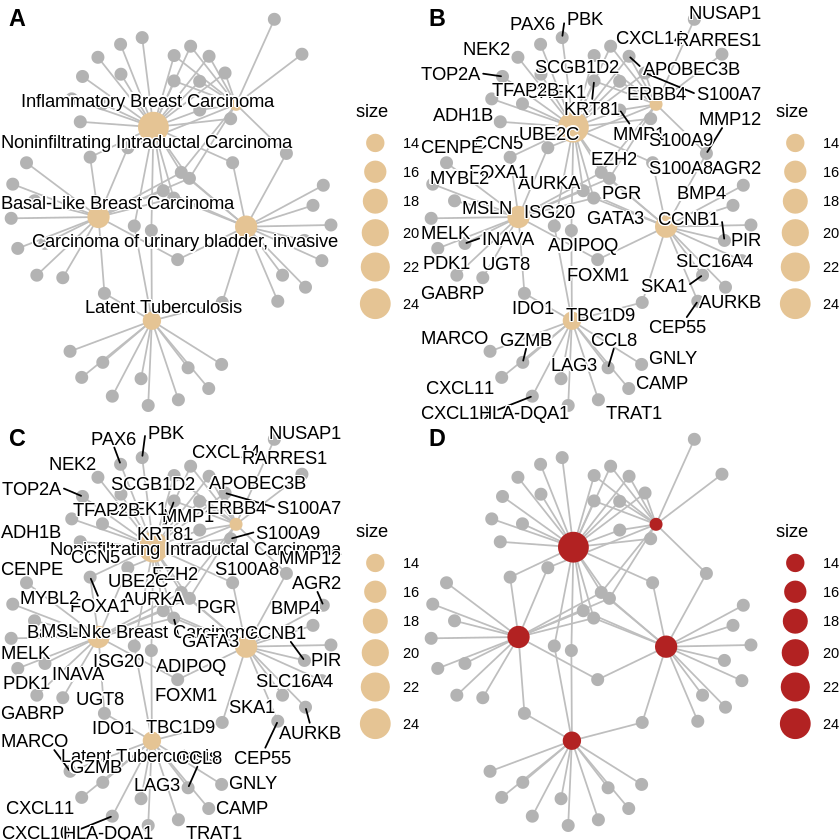

In [ ]:
p1 <- cnetplot(edox, node_label="category",
        cex_label_category = 1.2)
p2 <- cnetplot(edox, node_label="gene",
        cex_label_gene = 0.8)
p3 <- cnetplot(edox, node_label="all")
p4 <- cnetplot(edox, node_label="none",
        color_category='firebrick',
        color_gene='steelblue')
cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])

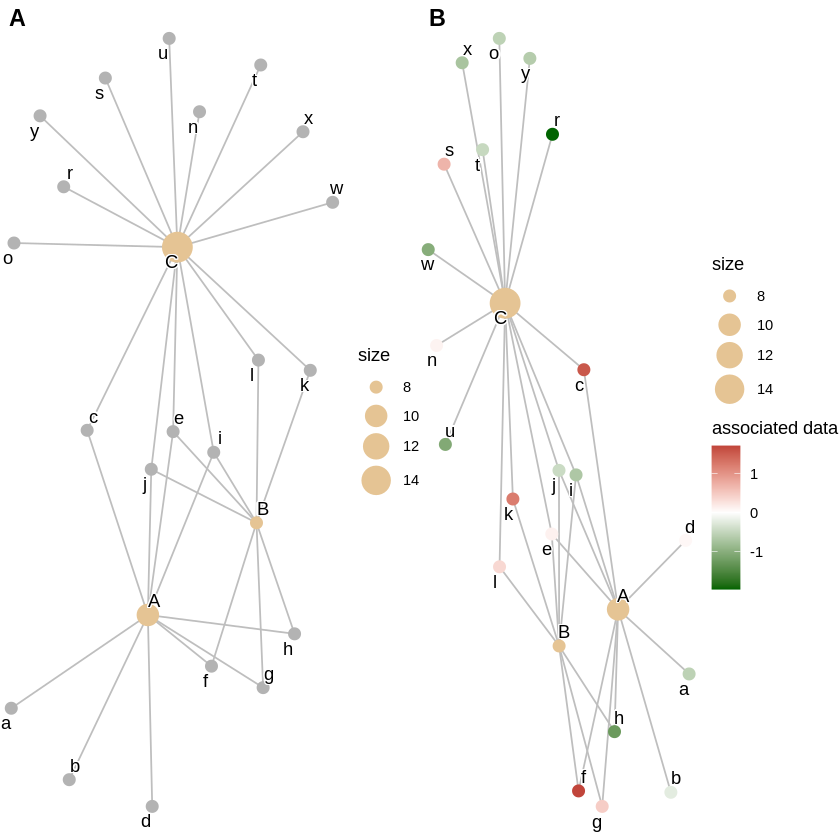

In [ ]:
# install.packages("ggplot2")
library(ggplot2)
set.seed(123)
x <- list(A = letters[1:10], B=letters[5:12], C=letters[sample(1:26, 15)])
p1 <- cnetplot(x)

set.seed(123)
d <- setNames(rnorm(26), letters)
p2 <- cnetplot(x, foldChange=d) +
    scale_color_gradient2(name='associated data', low='darkgreen', high='firebrick')

cowplot::plot_grid(p1, p2, ncol=2, labels=LETTERS[1:2])

**4) Heatmap-like functional classification**

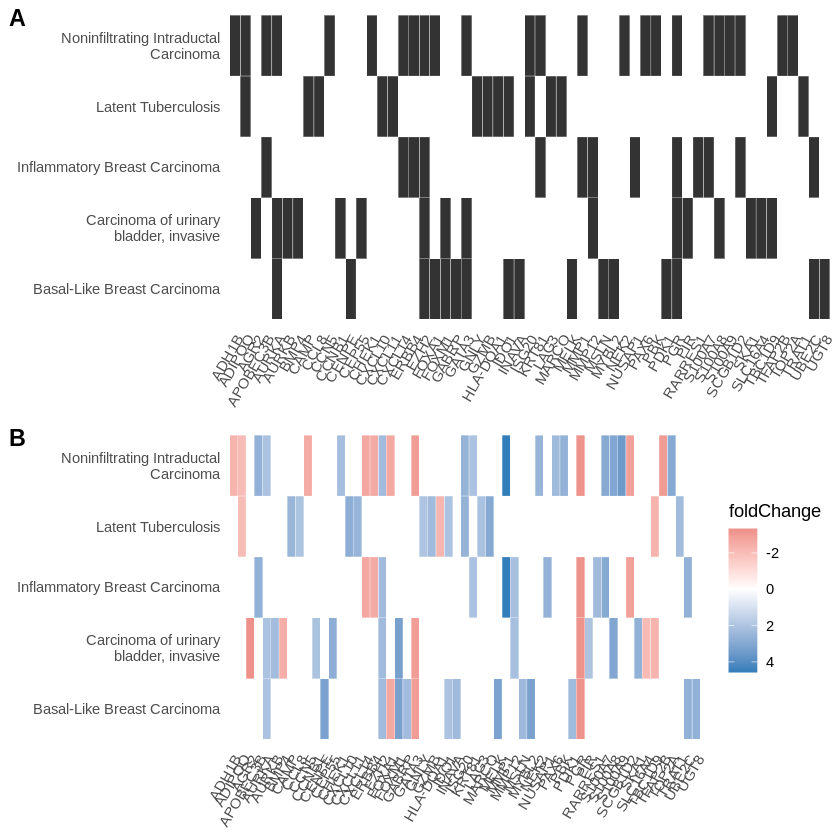

In [ ]:
p1 <- heatplot(edox, showCategory=5)
p2 <- heatplot(edox, foldChange=geneList, showCategory=5)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

**5) Tree plot**

Warning message in treeplot.enrichResult(x, ...):
“Use 'cluster.params = list(method = your_value)' instead of 'hclust_method'.
 The hclust_method parameter will be removed in the next version.”


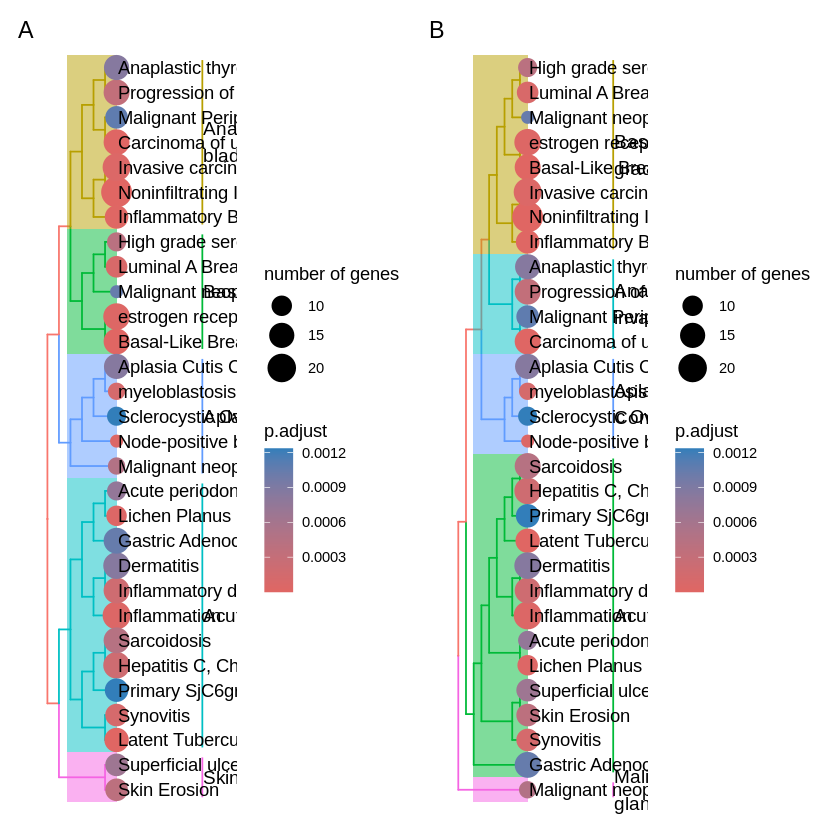

In [ ]:
edox2 <- pairwise_termsim(edox)
p1 <- treeplot(edox2)
p2 <- treeplot(edox2, hclust_method = "average")
aplot::plot_list(p1, p2, tag_levels='A')

**6) UpSet Plot**

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'ggupset'

Old packages: 'data.table', 'processx'



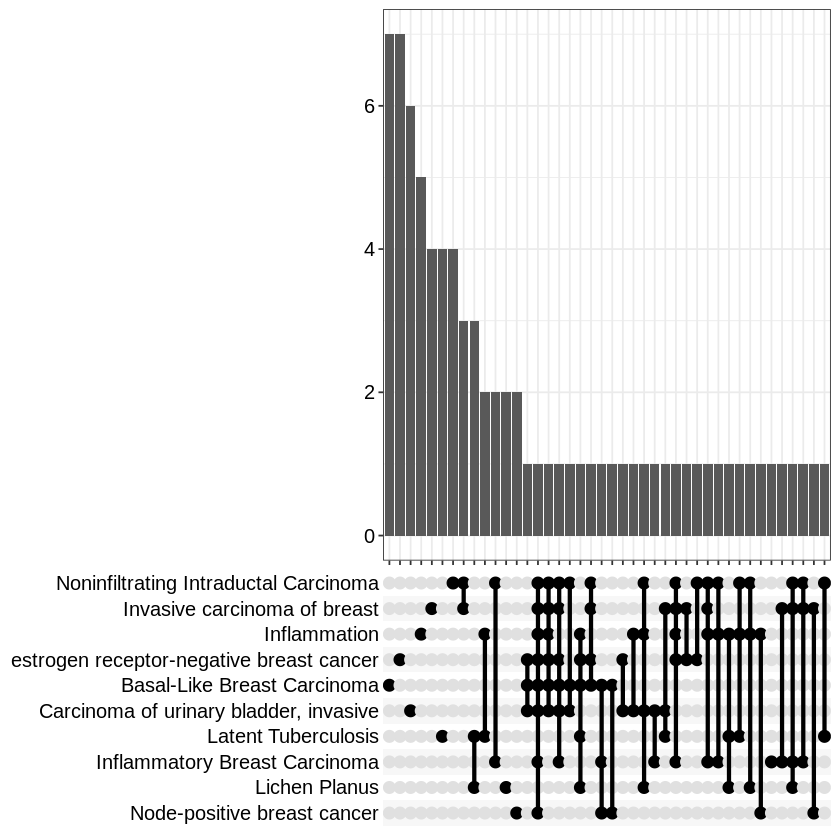

In [ ]:
# Install the required package 'ggupset'
if (!requireNamespace("ggupset", quietly = TRUE)) {
    BiocManager::install("ggupset")
}
# Load the 'ggupset' package
library(ggupset)

#Now you can use the upsetplot function
upsetplot(edo)

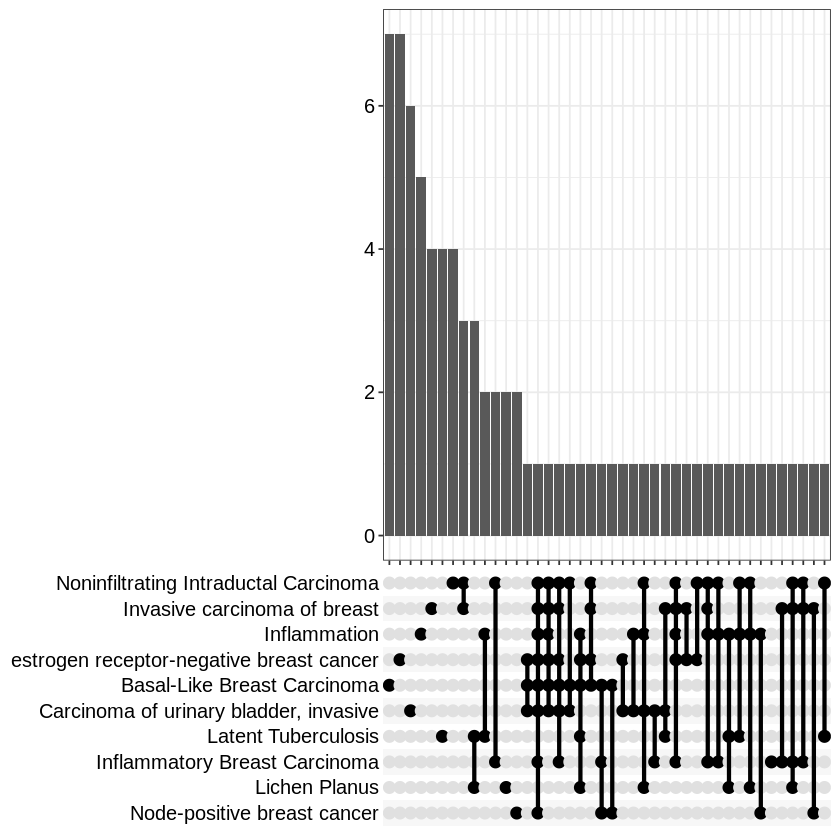

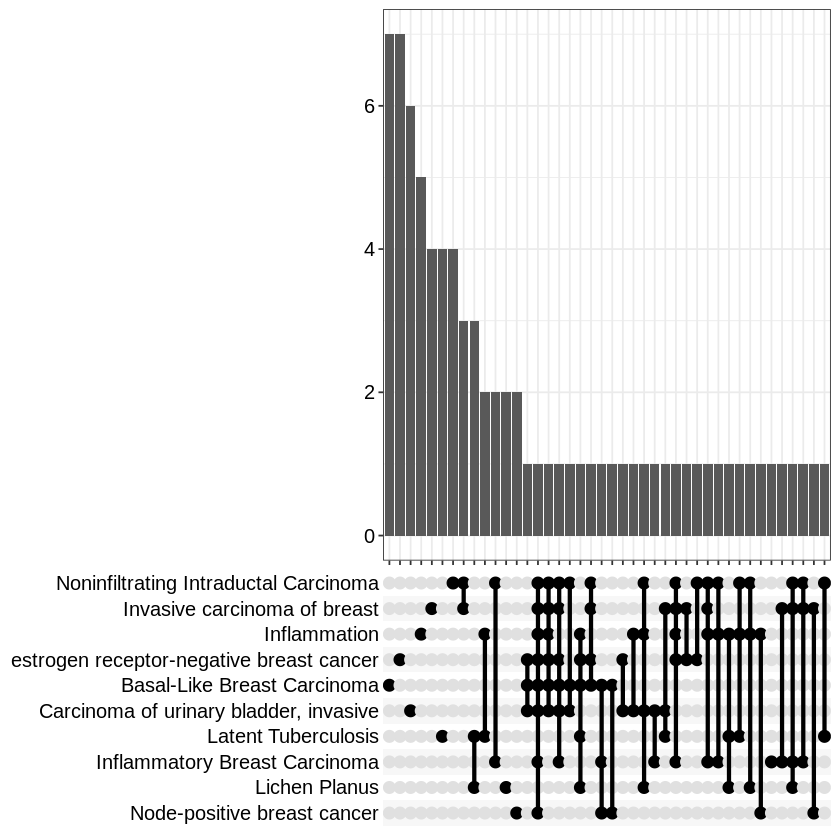

In [ ]:
# Install the required package 'ggupset'
if (!requireNamespace("ggupset", quietly = TRUE)) {
    BiocManager::install("ggupset")
}
# Load the 'ggupset' package
library(ggupset)

#Now you can use the upsetplot function
upsetplot(edo) # This line works as edo was defined previously

# Define or assign a value to kk2 before using it in upsetplot
kk2 <- edo # Assuming you intended to use the same data as in upsetplot(edo)
upsetplot(kk2)

**7) ridgeline plot for expression distribution of GSEA result**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Picking joint bandwidth of 0.271



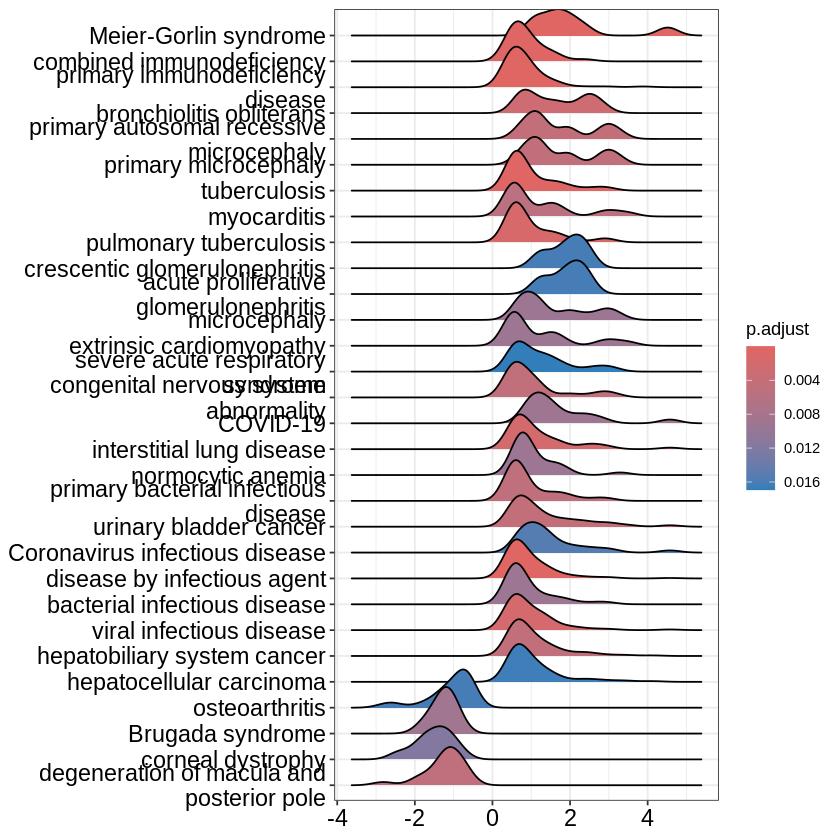

In [ ]:
# Install the required package 'ggridges'
if (!requireNamespace("ggridges", quietly = TRUE)) {
    install.packages("ggridges")
}

# Load the 'ggridges' package
library(ggridges)

# Now you can use the ridgeplot function
ridgeplot(edo2)

**8) running score and preranked list of GSEA result**

Warning message in as_grob.default(plot):
“Cannot convert object of class gglistlist into a grob.”


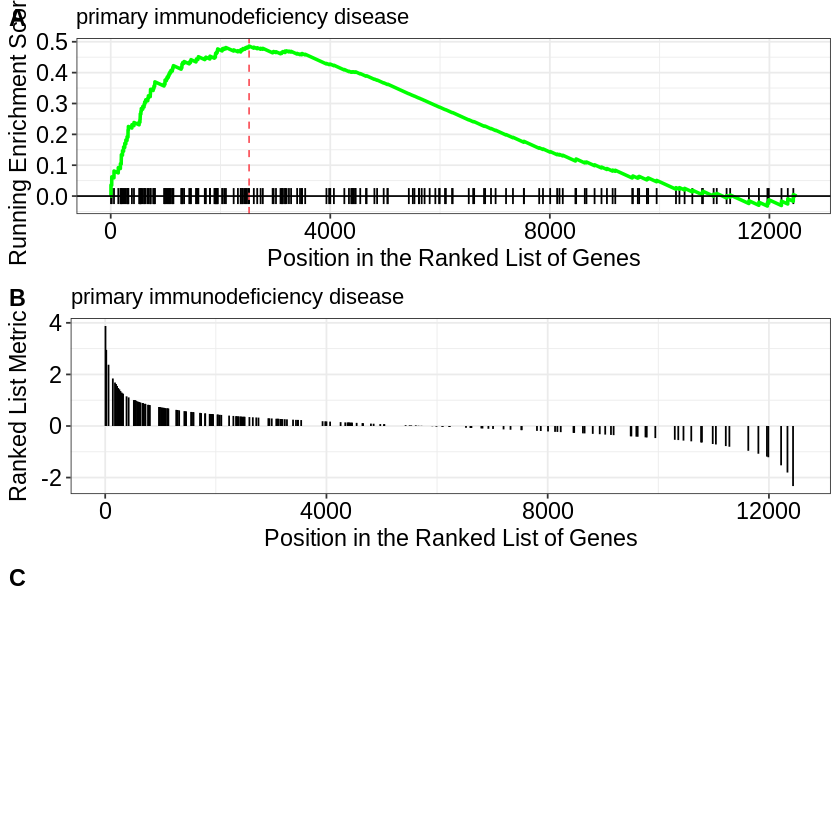

In [ ]:
p1 <- gseaplot(edo2, geneSetID = 1, by = "runningScore", title = edo2$Description[1])
p2 <- gseaplot(edo2, geneSetID = 1, by = "preranked", title = edo2$Description[1])
p3 <- gseaplot(edo2, geneSetID = 1, title = edo2$Description[1])
cowplot::plot_grid(p1, p2, p3, ncol=1, labels=LETTERS[1:3])

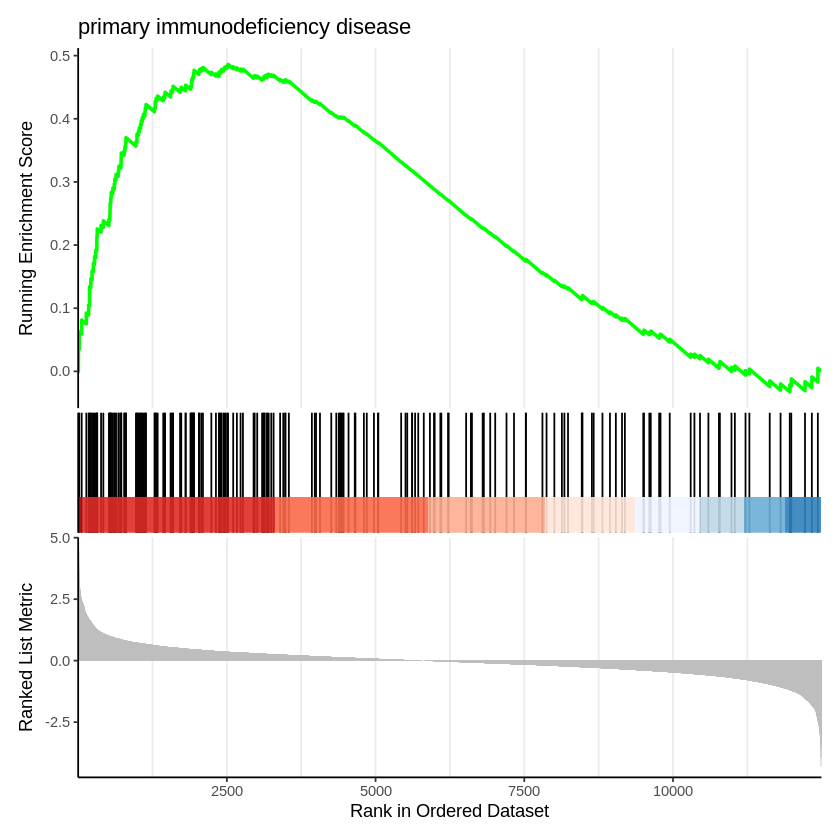

In [ ]:
gseaplot2(edo2, geneSetID = 1, title = edo2$Description[1])

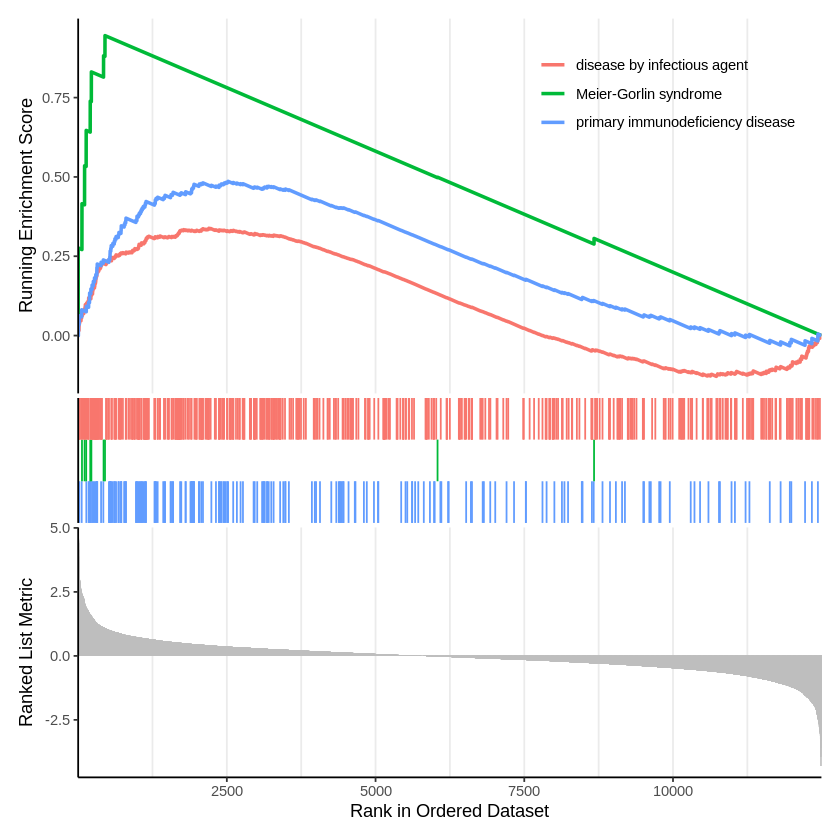

In [ ]:
gseaplot2(edo2, geneSetID = 1:3)

In [ ]:
# Install the required package 'gridExtra'
if (!requireNamespace("gridExtra", quietly = TRUE)) {
    install.packages("gridExtra")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



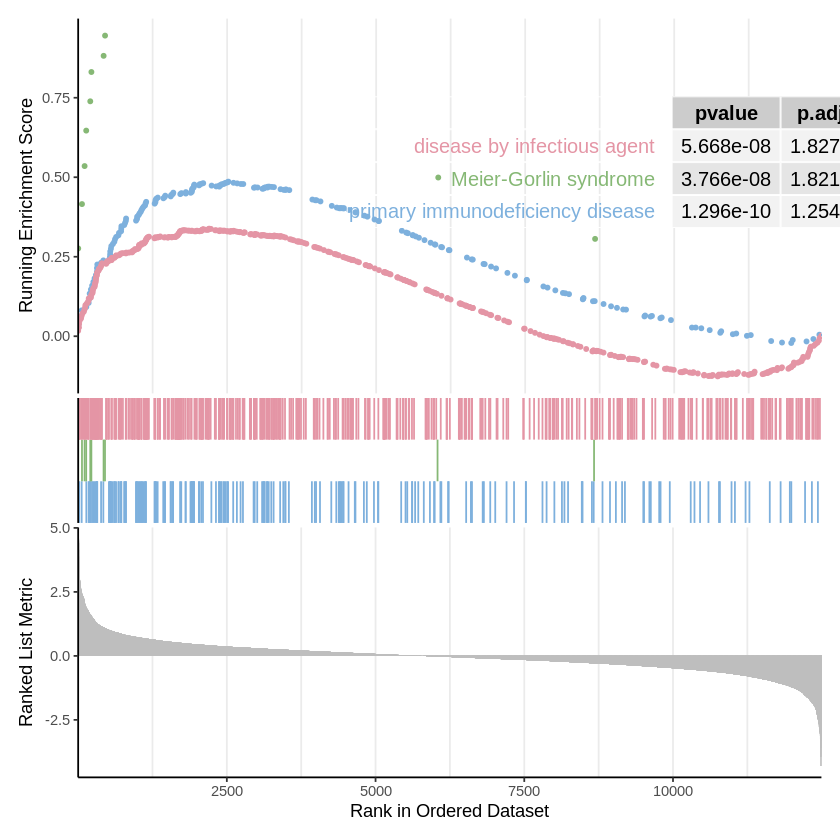

In [ ]:
gseaplot2(edo2, geneSetID = 1:3, pvalue_table = TRUE,
          color = c("#E495A5", "#86B875", "#7DB0DD"), ES_geom = "dot")

Warning message in as_grob.default(plot):
“Cannot convert object of class gglistlist into a grob.”


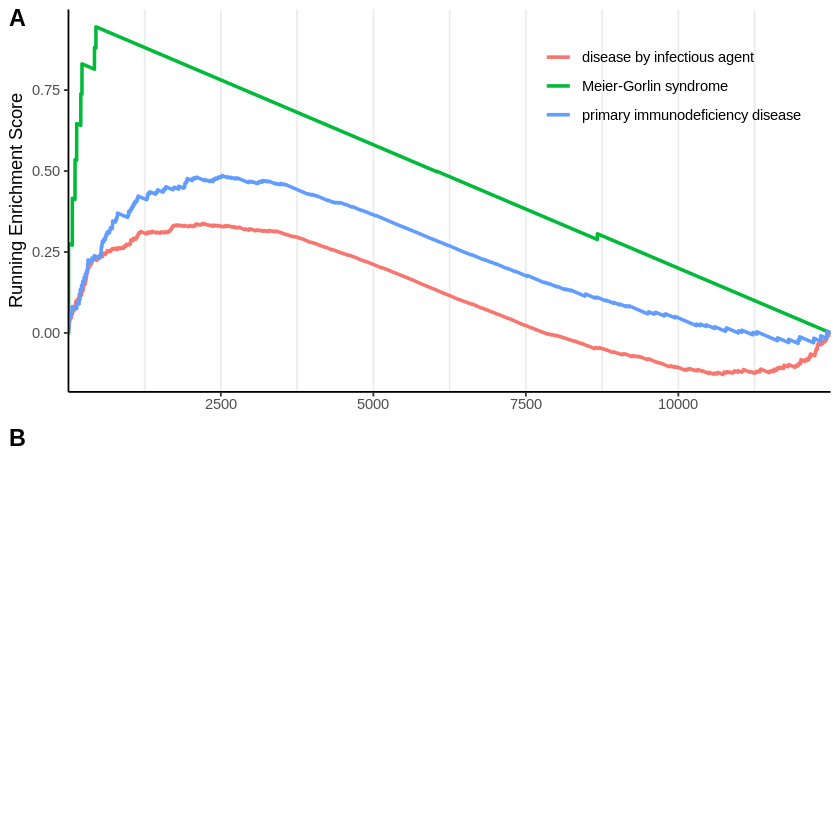

In [ ]:
p1 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1)
p2 <- gseaplot2(edo2, geneSetID = 1:3, subplots = 1:2)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

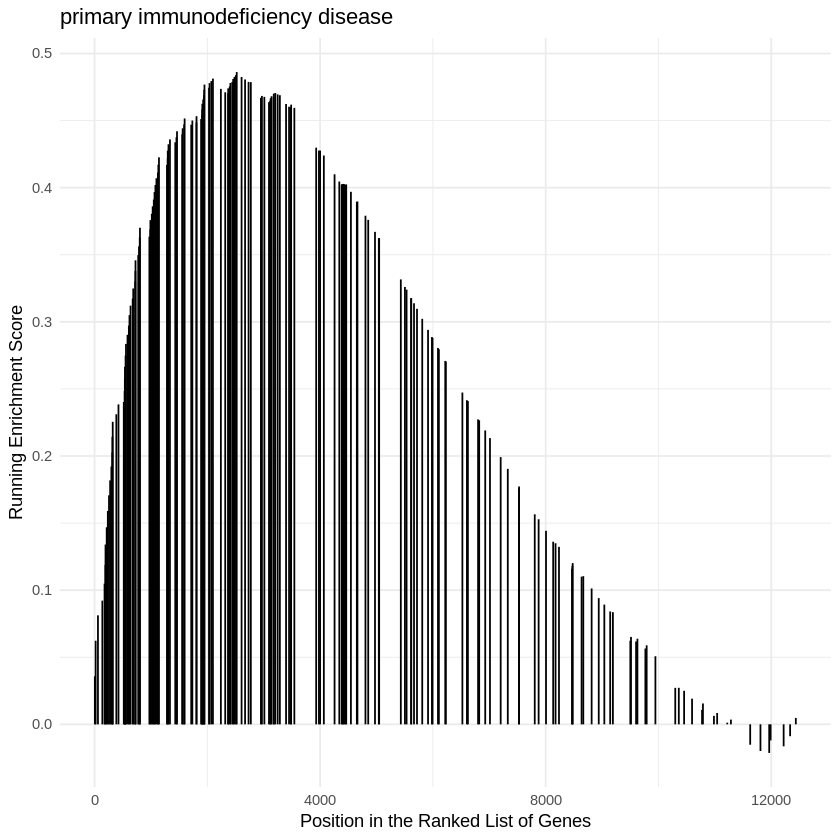

In [ ]:
gsearank(edo2, 1, title = edo2[1, "Description"])

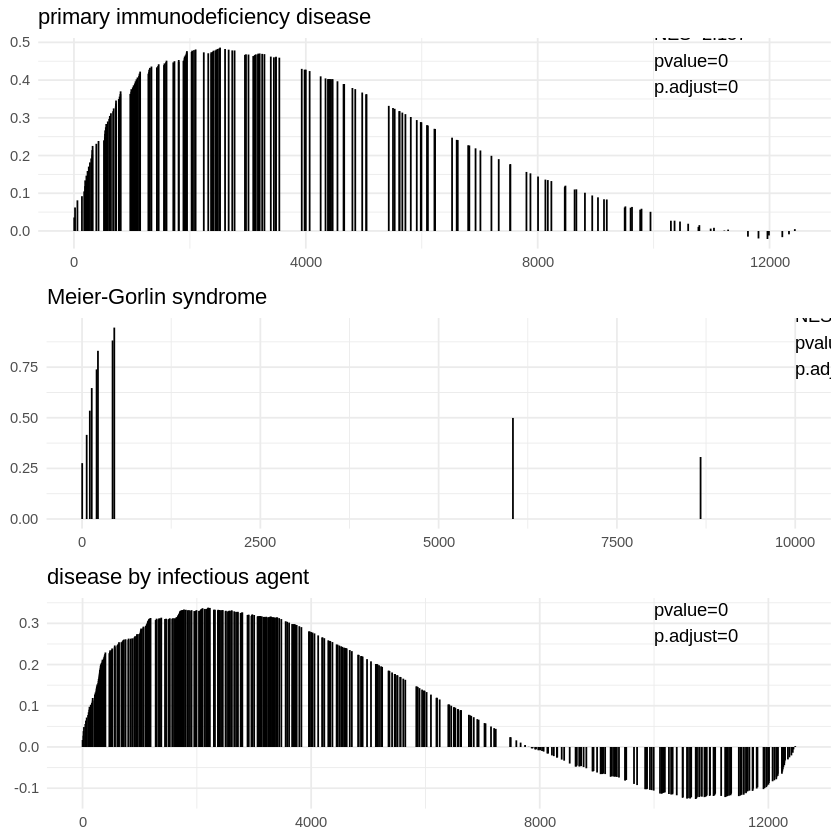

In [ ]:
library(ggplot2)
library(cowplot)

pp <- lapply(1:3, function(i) {
    anno <- edo2[i, c("NES", "pvalue", "p.adjust")]
    lab <- paste0(names(anno), "=",  round(anno, 3), collapse="\n")

    gsearank(edo2, i, edo2[i, 2]) + xlab(NULL) +ylab(NULL) +
        annotate("text", 10000, edo2[i, "enrichmentScore"] * .75, label = lab, hjust=0, vjust=0)
})
plot_grid(plotlist=pp, ncol=1)

**9) pubmed trend of enriched terms**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘urltools’




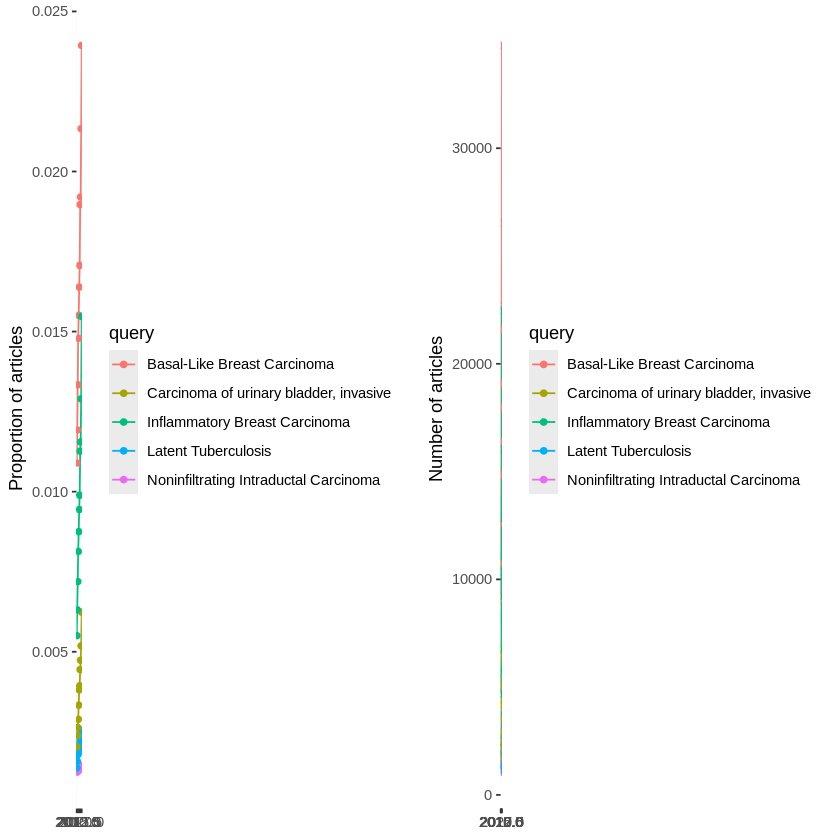

In [ ]:
# Install the required package 'europepmc'
if (!requireNamespace("europepmc", quietly = TRUE)) {
    install.packages("europepmc")
}

# Load the 'europepmc' package
library(europepmc)

# Now you can use the pmcplot function
terms <- edo$Description[1:5]
p <- pmcplot(terms, 2010:2020)
p2 <- pmcplot(terms, 2010:2020, proportion=FALSE)
cowplot::plot_grid(p, p2, ncol=2)

Finally, you have learned the visualization of enrichment analysis.